In [95]:
#Importación de librerías
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

#Configuraciones
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)


In [96]:

#Lectura y visualización de matriz de datos
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\MECMT04\TP AEM - database.xlsx"
df = pd.read_excel(path).sort_values(by='Country Name')
df

,Country Name,Country Code,Agricultural land (% of land area),Arable land (% of land area),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Rural population (% of total population)
0,Argentina,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090
1,Australia,AUS,47.1238,3.9746,2.1059,0.6622,2.1131,2.5583,13.8760
2,Austria,AUT,32.1281,16.0631,1.5208,1.8149,1.0524,3.6561,41.4850
3,Belgium,BEL,44.7960,28.3120,1.2331,1.0485,0.6700,0.9196,1.9590
4,Canada,CAN,6.4344,4.3107,3.6934,0.8181,1.6971,1.5105,18.5180
5,Chile,CHL,15.2390,1.7577,6.9273,0.7305,3.9878,9.0692,12.3570
6,Colombia,COL,39.9766,1.9040,4.0533,0.8649,6.4107,16.1112,18.8960
7,Costa Rica,CRI,34.7826,4.7591,1.8074,1.0280,4.2021,15.3081,19.9240
8,Czechia,CZE,45.6400,32.1800,1.3095,1.0655,1.8608,2.6638,26.0790
9,Denmark,DNK,65.6491,59.8983,2.5385,2.4779,1.2663,2.2230,12.0060


In [97]:
df.columns = df.columns.str.replace(r"\s*\(.*\)", "", regex=True) #Se elimina información entre paréntesis
ndf = df.iloc[:,1:].set_index('Country Code') #ndf: numereric data frame

In [98]:
#Breve información de la matriz de datos (cantidad de observaciones, tipo de formatos, etc.)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, ARG to USA
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agricultural land                                39 non-null     float64
 1   Arable land                                      39 non-null     float64
 2   Agricultural raw materials exports               39 non-null     float64
 3   Agricultural raw materials imports               39 non-null     float64
 4   Agriculture, forestry, and fishing, value added  39 non-null     float64
 5   Employment in agriculture                        39 non-null     float64
 6   Rural population                                 39 non-null     float64
dtypes: float64(7)
memory usage: 2.4+ KB


In [99]:
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
desc = ndf.describe()
cv = pd.DataFrame(ndf.std() / ndf.mean()).T
cv.index = ['cv']
kurt = pd.DataFrame(ndf.kurt()).T
kurt.index = ['kurt']
skew = pd.DataFrame(ndf.skew()).T
skew.index = ['skew']
desc = pd.concat([desc, cv, kurt, skew], axis=0).reset_index()
desc = desc.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'
desc

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [100]:
#Estadísticas descriptivas (sin incluir Argentina)
ndf_oecd = ndf.drop('ARG')
desc_oecd = ndf_oecd.describe()
cv_oecd = pd.DataFrame(ndf_oecd.std() / ndf_oecd.mean()).T
cv_oecd.index = ['cv']
kurt_oecd = pd.DataFrame(ndf_oecd.kurt()).T
kurt_oecd.index = ['kurt']
skew_oecd = pd.DataFrame(ndf_oecd.skew()).T
skew_oecd.index = ['skew']
desc_oecd = pd.concat([desc_oecd, cv_oecd, kurt_oecd, skew_oecd], axis=0).reset_index()
desc_oecd = desc_oecd.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'

#Para Argentina
ndf_arg = ndf.loc[['ARG']].reset_index()

display(desc_oecd, ndf_arg)

# """Ver si ARG no se encuentra muy fuera del promedio de la OCDE"""

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000,38.0000
1,mean,38.2349,18.3569,2.4465,1.3775,2.3334,5.0116,21.5999
2,std,17.5183,13.8070,2.8728,0.6408,1.5686,4.4405,11.1874
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.7273,6.6695,0.6938,0.8884,1.2844,2.1149,13.5078
5,50%,43.7443,16.3399,1.3380,1.1531,1.8841,3.7172,19.3630
6,75%,48.6791,27.4033,2.7402,1.7839,3.2592,5.7397,29.0370
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4582,0.7521,1.1742,0.4652,0.6723,0.8860,0.5179
9,kurt,-0.4182,0.7749,4.1573,0.0087,0.9200,1.9896,-0.3474


,Country Code,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,ARG,42.5908,14.9117,0.8813,1.0457,5.3186,7.3309,8.0090


In [101]:
#Cálculo de matriz de varianzas y covarianzas (incluye todos los registros)
mcov = ndf.cov()
mcov

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,299.2999,143.1640,-15.1587,-0.2389,-1.6690,5.1291,28.7369
Arable land,143.1640,185.9197,-9.1130,3.2334,-5.5738,-11.6462,21.6284
Agricultural raw materials exports,-15.1587,-9.1130,8.0986,0.5600,1.6387,1.1587,-1.0304
Agricultural raw materials imports,-0.2389,3.2334,0.5600,0.4027,0.0430,0.1770,2.0701
"Agriculture, forestry, and fishing, value added",-1.6690,-5.5738,1.6387,0.0430,2.6243,5.7188,-0.8835
Employment in agriculture,5.1291,-11.6462,1.1587,0.1770,5.7188,19.3369,7.1725
Rural population,28.7369,21.6284,-1.0304,2.0701,-0.8835,7.1725,126.6001


In [102]:
#Cálculo de matriz de correlaciones (incluye todos los registros)
mcor = ndf.corr()
mcor

,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
Agricultural land,1.0000,0.6069,-0.3079,-0.0218,-0.0596,0.0674,0.1476
Arable land,0.6069,1.0000,-0.2349,0.3737,-0.2523,-0.1942,0.1410
Agricultural raw materials exports,-0.3079,-0.2349,1.0000,0.3101,0.3555,0.0926,-0.0322
Agricultural raw materials imports,-0.0218,0.3737,0.3101,1.0000,0.0419,0.0634,0.2899
"Agriculture, forestry, and fishing, value added",-0.0596,-0.2523,0.3555,0.0419,1.0000,0.8028,-0.0485
Employment in agriculture,0.0674,-0.1942,0.0926,0.0634,0.8028,1.0000,0.1450
Rural population,0.1476,0.1410,-0.0322,0.2899,-0.0485,0.1450,1.0000


In [103]:
#Medidas de variabilidad conjunta y medidas de correlación conjunta
varianza_total = np.trace(mcov)
varianza_media = varianza_total / len(ndf.columns)
varianza_generalizada = np.linalg.det(mcov)
varianza_efectiva = varianza_generalizada**(1/len(ndf.columns))

dependencia_conjunta = np.linalg.det(mcor)
dependencia_efectiva = dependencia_conjunta**(1/(len(ndf.columns)-1))

medidas_globales = pd.DataFrame([[varianza_total, varianza_media, varianza_generalizada, varianza_efectiva, dependencia_conjunta, dependencia_efectiva]],
                                columns=['varianza_total', 'varianza_media', 'varianza_generalizada', 'varianza_efectiva', 'dependencia_conjunta', 'dependencia_efectiva'])
medidas_globales

,varianza_total,varianza_media,varianza_generalizada,varianza_efectiva,dependencia_conjunta,dependencia_efectiva
0,642.2821,91.7546,77537504.1862,13.3990,0.0665,0.6365


In [104]:
"""
Análisis de Componentes Principales - Matriz de Covarianzas

"""

pca_cov = PCA()
componentes_cov = pca_cov.fit_transform(ndf)

varianza_cov = pca_cov.explained_variance_
std_componentes_cov = np.sqrt(pca_cov.explained_variance_) #Ver si eliminamos
varianza_explicada_cov = pca_cov.explained_variance_ratio_
varianza_explicada_acum_cov = np.cumsum(pca_cov.explained_variance_ratio_)
coeficientes_cov =  pca_cov.components_.T

#Generamos una tabla resumen
data_var_cov = {
    'Varianza (eigenvalues)': varianza_cov,
    'Desviación Estándar': std_componentes_cov,
    'Varianza Explicada': varianza_explicada_cov,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cov
}

variablespca_cov = pd.DataFrame(data_var_cov, index=[f'Componente {i+1}' for i in range(len(varianza_cov))]).reset_index()
variablespca_cov



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,402.1466,20.0536,0.6261,0.6261
1,Componente 2,122.5019,11.0681,0.1907,0.8169
2,Componente 3,91.1414,9.5468,0.1419,0.9588
3,Componente 4,18.4013,4.2897,0.0286,0.9874
4,Componente 5,7.2756,2.6973,0.0113,0.9987
5,Componente 6,0.6005,0.7749,0.0009,0.9997
6,Componente 7,0.2148,0.4635,0.0003,1.0000


In [105]:
coeficientespca_cov = pd.DataFrame(coeficientes_cov, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cov.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cov


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,0.8187,-0.1213,-0.5521,-0.0820,0.0568,-0.0018,0.0134
1,Arable land,0.5575,-0.0498,0.8125,0.1600,-0.0063,0.0045,-0.0311
2,Agricultural raw materials exports,-0.0448,0.0119,0.0085,0.1400,0.9733,-0.1460,-0.0976
3,Agricultural raw materials imports,0.0046,0.0158,0.0297,0.0361,0.0723,-0.1409,0.9861
4,"Agriculture, forestry, and fishing, value added",-0.0117,0.0002,-0.0518,0.3047,0.1084,0.9376,0.1164
5,Employment in agriculture,-0.0039,0.0685,-0.1766,0.9216,-0.1799,-0.2815,-0.0565
6,Rural population,0.1293,0.9888,-0.0152,-0.0682,0.0062,0.0234,-0.0106


In [106]:
componentespca_cov = pd.DataFrame(componentes_cov, columns=[f'Componente {i+1} ' for i in range(componentes_cov.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cov

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,-0.0846,-13.3099,-5.4421,2.7610,-1.4191,2.0268,0.3427
1,Australia,-1.7125,-7.8332,-15.9116,-4.9780,0.6197,0.3196,0.0796
2,Austria,-3.6418,20.7706,1.6602,-3.0475,-0.9359,-0.3337,0.2181
3,Belgium,8.4727,-20.6625,5.6962,-2.1385,-0.4236,-0.6640,-0.1900
4,Canada,-34.3002,1.6272,6.9804,-2.7682,0.0333,0.1560,-0.5140
5,Chile,-29.5127,-4.8508,-1.2903,4.6346,2.5412,-0.4551,-0.8141
6,Colombia,-8.2587,-0.9436,-16.3184,9.0139,0.1951,0.3427,-0.2610
7,Costa Rica,-10.6563,0.4815,-10.9047,8.1051,-2.3809,-1.1507,-0.2619
8,Czechia,14.4143,3.0130,7.6379,-1.2515,-0.3592,0.5274,-0.5062
9,Denmark,44.3896,-14.7035,19.4860,2.1380,1.8289,-0.5256,0.2783


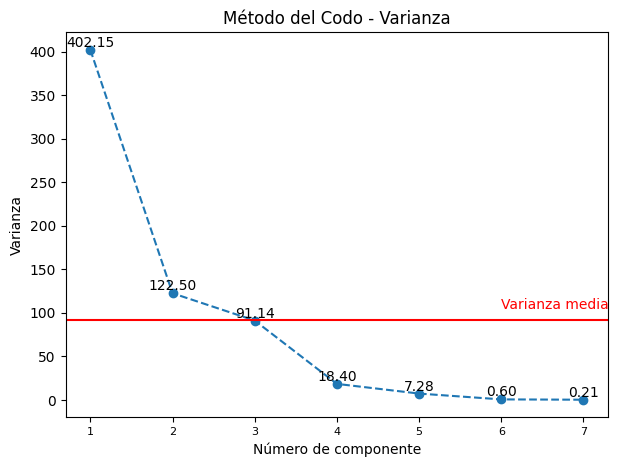

In [107]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cov) + 1), varianza_cov, marker='o', linestyle='--')
ax.axhline(y=varianza_total/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cov)-1, varianza_total/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

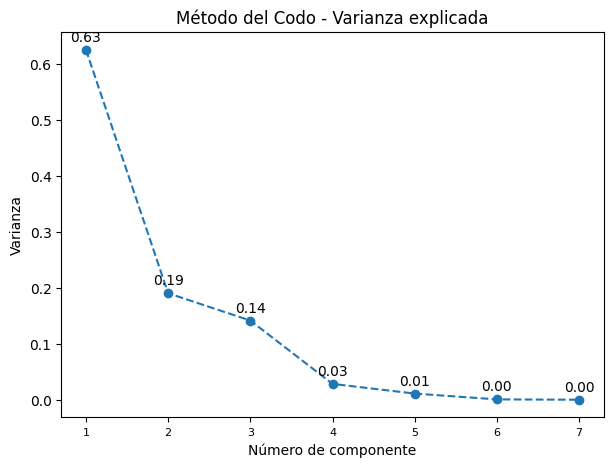

In [108]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cov) + 1), varianza_explicada_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

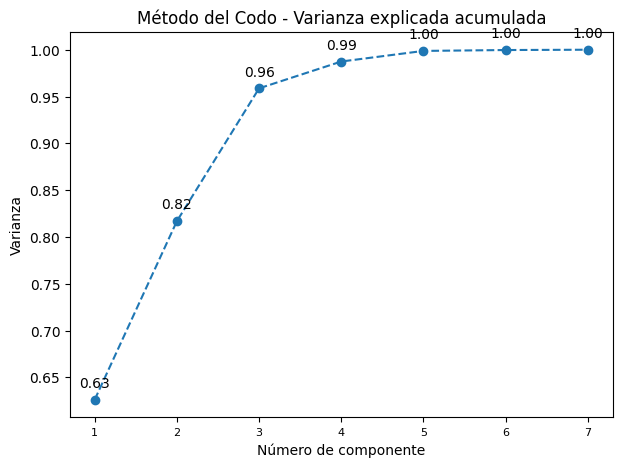

In [109]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cov) + 1), varianza_explicada_acum_cov, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cov):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [110]:
"""
Análisis de Componentes Principales - Matriz de Correlaciones
"""

ndf_media = ndf.mean()
ndf_de = ndf.std()
ndf_scaled = ((ndf - ndf_media) / ndf_de)

pca_cor = PCA()
componentes_cor = pca_cor.fit_transform(ndf_scaled)

varianza_cor = pca_cor.explained_variance_
std_componentes_cor = np.sqrt(pca_cor.explained_variance_) #Ver si eliminamos
varianza_explicada_cor = pca_cor.explained_variance_ratio_
varianza_explicada_acum_cor = np.cumsum(pca_cor.explained_variance_ratio_)
coeficientes_cor =  pca_cor.components_.T

#Generamos una tabla resumen
data_var_cor = {
    'Varianza (eigenvalues)': varianza_cor,
    'Desviación Estándar': std_componentes_cor,
    'Varianza Explicada': varianza_explicada_cor,
    'Varianza Explicada Acumulada': varianza_explicada_acum_cor
}

variablespca_cor = pd.DataFrame(data_var_cor, index=[f'Componente {i+1}' for i in range(len(varianza_cor))]).reset_index()
variablespca_cor



,index,Varianza (eigenvalues),Desviación Estándar,Varianza Explicada,Varianza Explicada Acumulada
0,Componente 1,2.1735,1.4743,0.3105,0.3105
1,Componente 2,1.7162,1.3100,0.2452,0.5557
2,Componente 3,1.3338,1.1549,0.1905,0.7462
3,Componente 4,0.8960,0.9466,0.1280,0.8742
4,Componente 5,0.5298,0.7279,0.0757,0.9499
5,Componente 6,0.2262,0.4756,0.0323,0.9822
6,Componente 7,0.1245,0.3528,0.0178,1.0000


In [111]:
coeficientespca_cor = pd.DataFrame(coeficientes_cor, columns=[f'Coeficiente (eigenvector) {i+1}' for i in range(coeficientes_cor.shape[1])], index=ndf.columns).reset_index()
coeficientespca_cor


,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [112]:
componentespca_cor = pd.DataFrame(componentes_cor, columns=[f'Componente {i+1} ' for i in range(componentes_cor.shape[1])], index=df.iloc[:,0]).reset_index()
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
6,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
7,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
8,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332
9,Denmark,-2.6090,1.9181,0.7859,-2.2559,-0.4244,0.1700,0.2428


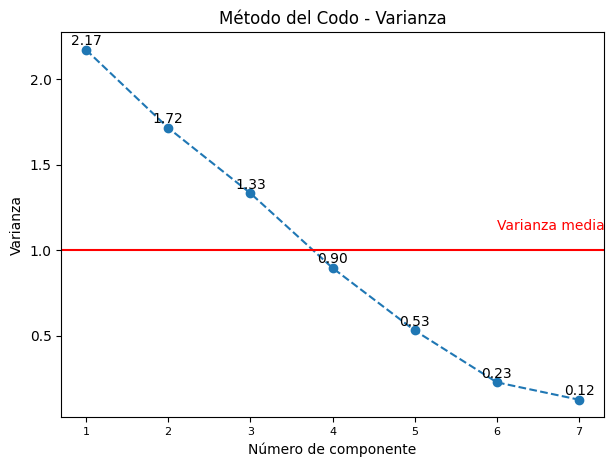

In [113]:
#Elección de Componentes Principales
#1. Método del Codo - Varianza

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_cor) + 1), varianza_cor, marker='o', linestyle='--')
ax.axhline(y=np.trace(mcor)/ndf.shape[1], color='red', linestyle='-', linewidth=1.5)
ax.text(len(varianza_cor)-1, np.trace(mcor)/ndf.shape[1]*1.1, 'Varianza media', color='red', ha='left', va='bottom')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza')
for i, v in enumerate(varianza_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

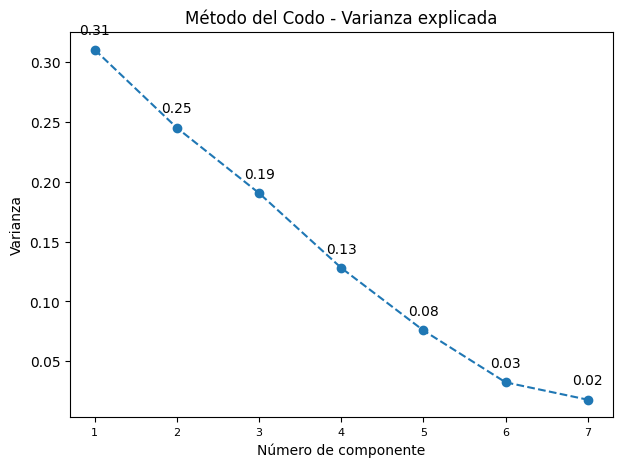

In [114]:
#2. Método del Codo - Varianza explicada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_cor) + 1), varianza_explicada_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada')
for i, v in enumerate(varianza_explicada_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

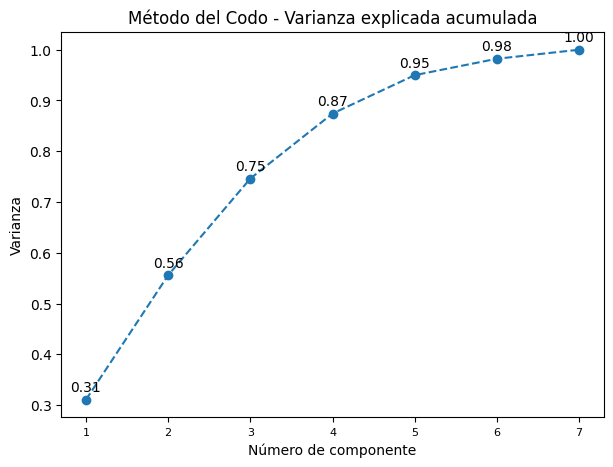

In [115]:
#3. Método del Codo - Varianza explicada acumulada

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(1, len(varianza_explicada_acum_cor) + 1), varianza_explicada_acum_cor, marker='o', linestyle='--')
ax.set_xlabel('Número de componente')
ax.set_ylabel('Varianza')
ax.set_title('Método del Codo - Varianza explicada acumulada')
for i, v in enumerate(varianza_explicada_acum_cor):
    ax.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

In [116]:
#Selección de componentes
componentes = componentespca_cor.iloc[:,0:3]
componentes

,Country Name,Componente 1,Componente 2
0,Argentina,1.1384,0.0073
1,Australia,-0.0137,-1.3198
2,Austria,-0.6793,0.4337
3,Belgium,-1.4955,-1.2323
4,Canada,0.7388,-2.1212
5,Chile,2.6753,-1.0488
6,Colombia,3.2579,0.9243
7,Costa Rica,2.1246,0.4846
8,Czechia,-1.2336,0.1987
9,Denmark,-2.6090,1.9181


In [117]:
#Estadísticas descriptivas (para todos los países). Obs: Siempre se considerarán medidas muestrales. 
ncomponentes = componentes.iloc[:,1:]
desc_pca = componentes.describe()
cv_pca = pd.DataFrame(ncomponentes.std() / ncomponentes.mean()).T
cv_pca.index = ['cv']
kurt_pca = pd.DataFrame(ncomponentes.kurt()).T
kurt_pca.index = ['kurt']
skew_pca = pd.DataFrame(ncomponentes.skew()).T
skew_pca.index = ['skew']
desc_pca = pd.concat([desc_pca, cv_pca, kurt_pca, skew_pca], axis=0).reset_index()
desc_pca = desc.rename(columns = {'index': 'Medida'}) #Ver si corresponde nombre 'Estadístico'
desc_pca

,Medida,Agricultural land,Arable land,Agricultural raw materials exports,Agricultural raw materials imports,"Agriculture, forestry, and fishing, value added",Employment in agriculture,Rural population
0,count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000
1,mean,38.3466,18.2686,2.4064,1.3690,2.4099,5.0710,21.2514
2,std,17.3003,13.6352,2.8458,0.6346,1.6200,4.3974,11.2517
3,min,2.6959,1.2000,0.1410,0.5495,0.2154,0.6816,1.9590
4,25%,29.9538,6.9086,0.7088,0.9026,1.3024,2.1510,12.8710
5,50%,43.1253,16.1404,1.3095,1.1496,1.9073,3.7783,19.2910
6,75%,48.3528,26.7491,2.6729,1.7546,3.3223,6.1308,28.8100
7,max,72.4230,59.8983,11.6780,2.9083,6.4107,18.1086,46.2710
8,cv,0.4512,0.7464,1.1826,0.4635,0.6722,0.8672,0.5295
9,kurt,-0.3435,0.8862,4.3522,0.1051,0.4283,1.9449,-0.3566


In [118]:
#Correlación entre primeros 2 componentes y variables de matriz de datos
cor_pca_variables = pd.concat([df.iloc[:, 2:], componentes.iloc[:,1:]], axis=1).corr().iloc[:-2, -2:]
cor_pca_variables

,Componente 1,Componente 2
Agricultural land,-0.5233,0.5347
Arable land,-0.6897,0.5526
Agricultural raw materials exports,0.5678,0.0998
Agricultural raw materials imports,-0.0255,0.6056
"Agriculture, forestry, and fishing, value added",0.8043,0.4104
Employment in agriculture,0.6627,0.5364
Rural population,-0.1219,0.5404


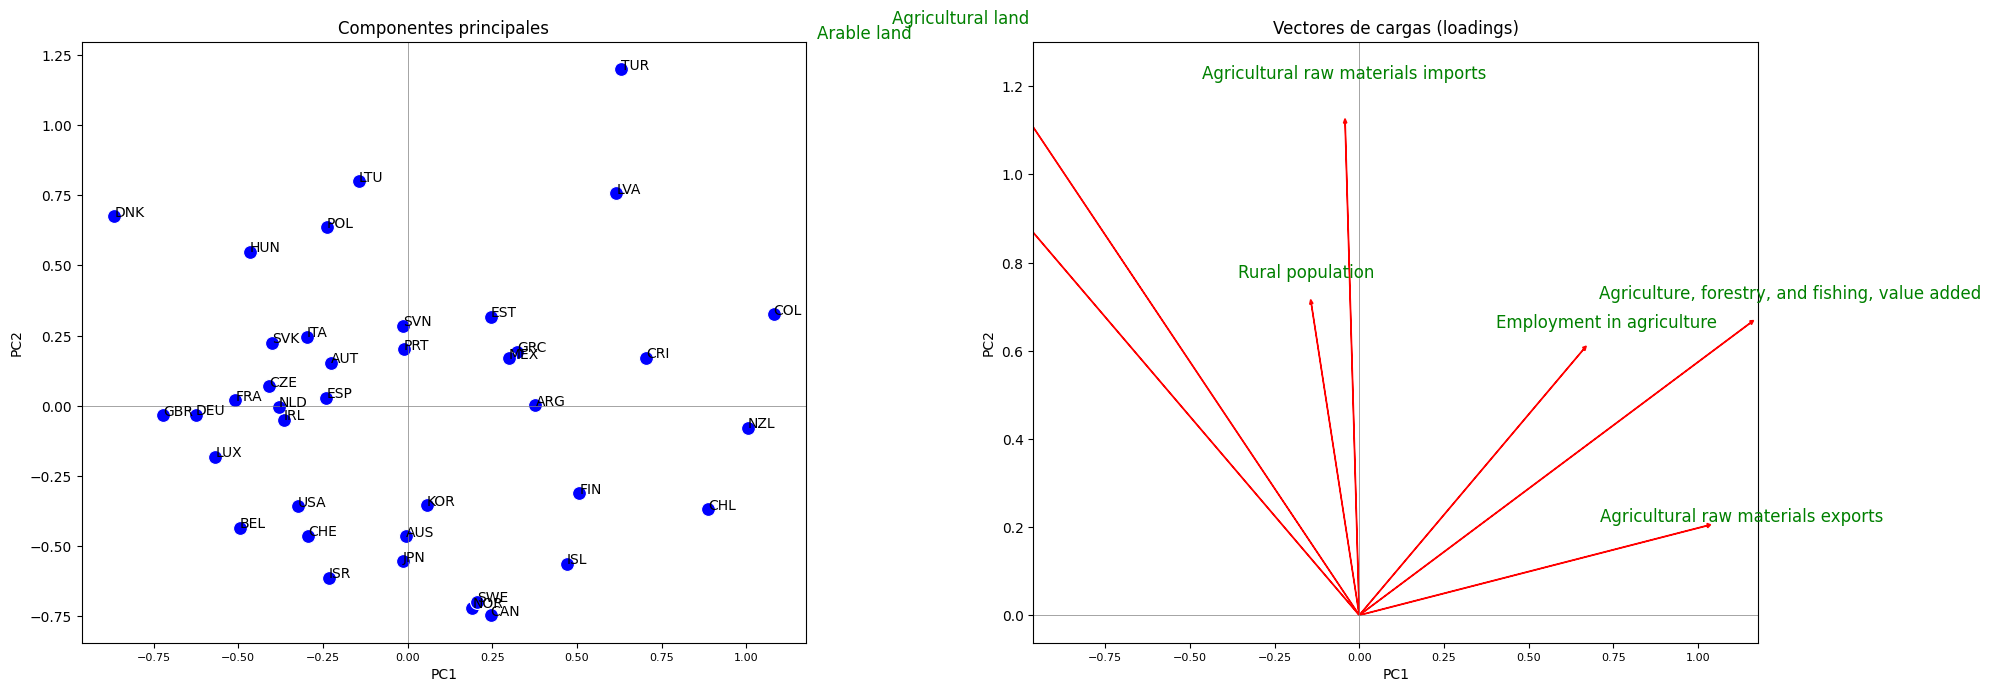

In [119]:
#Datos para gráfico Biplot. Se trbajará con c = 0.5 

ndf_scaled_promedio = np.mean(ndf_scaled, axis=0) #Dado que utilizaremos resultados de matriz de correlaciones, se trabaja sobre matriz de datos estandarizada
ndf_scaled_centrada = ndf_scaled - ndf_scaled_promedio

ndf_scaled_centrada_producto = np.dot(np.transpose(ndf_scaled_centrada), ndf_scaled_centrada)
autovalores, autovectores = np.linalg.eig(ndf_scaled_centrada_producto)

ndf_scaled_centrada_producto_autovalores = pd.DataFrame(np.diag(autovalores))
D = pd.DataFrame(np.diag(autovalores))
D_raiz_neg = pd.DataFrame(np.where(D != 0, np.power(D, -1/2),0))
D_cuarta = pd.DataFrame(np.where(D != 0, np.power(D, 1/4),0))

componentes_biplot = np.dot(componentespca_cor.iloc[:,1:], D_raiz_neg)
componentes_biplot = pd.DataFrame(np.dot(componentes_biplot, D_cuarta))

coeficientes_biplot = pd.DataFrame(np.dot(D_cuarta, coeficientespca_cor.iloc[:,1:]))

#Gráfico Biplot

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentes_biplot.iloc[:, 0], y=componentes_biplot.iloc[:, 1], ax=axes[0], s=100, color='blue')
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentes_biplot.iloc[i, 0], componentes_biplot.iloc[i, 1]))

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientes_biplot.shape[0]):
    axes[1].arrow(0, 0, coeficientes_biplot.iloc[i, 0], coeficientes_biplot.iloc[i, 1],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientes_biplot.iloc[i, 0]*1.1, coeficientes_biplot.iloc[i, 1]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

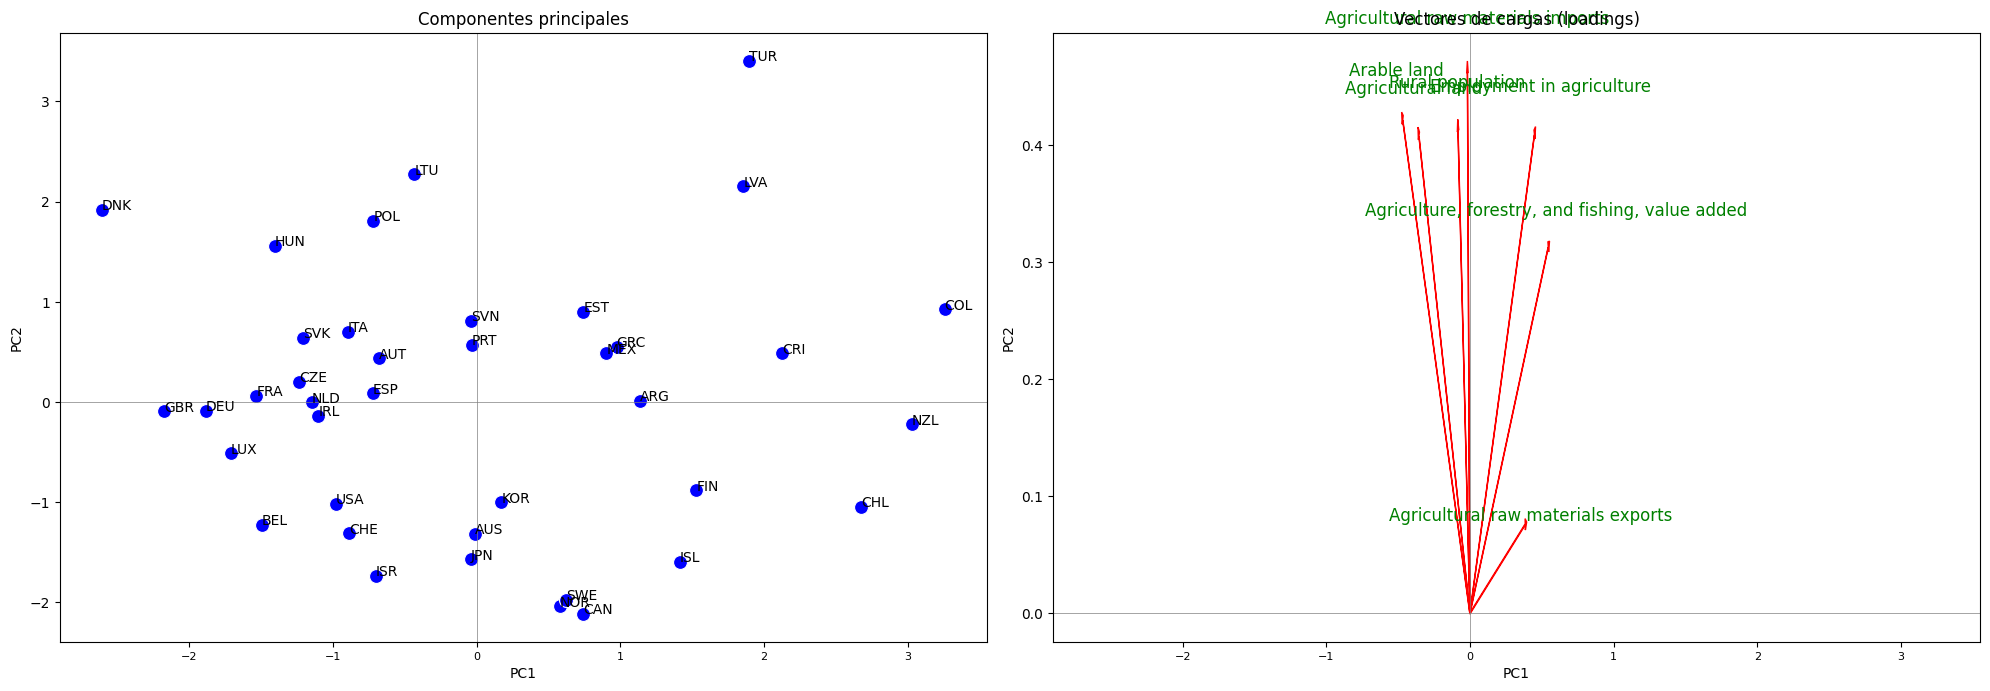

In [120]:
#Gráfico Biplot. Con c = 0

fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Primer gráfico: scatterplot de las componentes principales
sns.scatterplot(x=componentespca_cor.iloc[:, 1], y=componentespca_cor.iloc[:, 2], ax=axes[0], s=100, color='blue')
for i, txt in enumerate(df.iloc[:, 1]):
    axes[0].annotate(txt, (componentespca_cor.iloc[i, 1], componentespca_cor.iloc[i, 2]))
axes[0].axhline(0, color='gray', lw=0.5)
axes[0].axvline(0, color='gray', lw=0.5)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Componentes principales')

# Obtener los límites del eje x del primer gráfico
xlim = axes[0].get_xlim()

# Segundo gráfico: vectores de los coeficientes (cargas)
for i in range(coeficientespca_cor.shape[0]):
    axes[1].arrow(0, 0, coeficientespca_cor.iloc[i, 1], coeficientespca_cor.iloc[i, 2],
                  color='red', head_width=0.01, head_length=0.01)
    axes[1].text(coeficientespca_cor.iloc[i, 1]*1.1, coeficientespca_cor.iloc[i, 2]*1.1,
                 ndf.columns[i], color='green', ha='center', va='center', fontsize=12)

axes[1].axhline(0, color='gray', lw=0.5)
axes[1].axvline(0, color='gray', lw=0.5)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Vectores de cargas (loadings)')

# Establecer los mismos límites del eje x en el segundo gráfico
axes[1].set_xlim(xlim)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

In [121]:
coeficientespca_cor

,index,Coeficiente (eigenvector) 1,Coeficiente (eigenvector) 2,Coeficiente (eigenvector) 3,Coeficiente (eigenvector) 4,Coeficiente (eigenvector) 5,Coeficiente (eigenvector) 6,Coeficiente (eigenvector) 7
0,Agricultural land,-0.3549,0.4082,-0.4055,-0.2242,0.4675,-0.5048,-0.1388
1,Arable land,-0.4678,0.4219,0.0334,-0.3519,-0.0973,0.6512,0.2114
2,Agricultural raw materials exports,0.3852,0.0762,0.5127,-0.3129,0.6452,0.0444,0.2585
3,Agricultural raw materials imports,-0.0173,0.4622,0.5868,-0.1190,-0.4701,-0.4205,-0.1727
4,"Agriculture, forestry, and fishing, value added",0.5456,0.3133,-0.2479,-0.1807,-0.0170,0.3103,-0.6431
5,Employment in agriculture,0.4495,0.4094,-0.3699,0.0904,-0.2299,-0.1188,0.6468
6,Rural population,-0.0827,0.4125,0.1703,0.8204,0.2855,0.1787,-0.0866


In [122]:
componentespca_cor

,Country Name,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,Argentina,1.1384,0.0073,-1.5171,-0.9835,-0.4523,0.1920,-0.8570
1,Australia,-0.0137,-1.3198,-0.8034,-0.1355,0.7420,-0.5812,-0.3220
2,Austria,-0.6793,0.4337,1.0262,1.7488,-0.0818,-0.1336,-0.0111
3,Belgium,-1.4955,-1.2323,-0.3109,-1.4516,-0.1802,-0.0420,0.3132
4,Canada,0.7388,-2.1212,0.8035,0.5427,0.0614,0.5658,0.0869
5,Chile,2.6753,-1.0488,0.0127,-0.3939,0.5401,0.4322,0.5441
6,Colombia,3.2579,0.9243,-1.8244,-0.0762,0.2287,-0.0387,0.0737
7,Costa Rica,2.1246,0.4846,-1.5284,0.4385,-0.4708,-0.2790,0.6620
8,Czechia,-1.2336,0.1987,-0.2554,0.0877,0.3280,0.6721,-0.0332
9,Denmark,-2.6090,1.9181,0.7859,-2.2559,-0.4244,0.1700,0.2428


In [123]:
from sklearn.metrics import pairwise_distances

matriz_distancia = pairwise_distances(ndf, metric='euclidean')
pd.DataFrame(matriz_distancia)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.0000,14.4668,35.5548,16.8484,39.8128,31.3289,19.5689,19.2809,25.8445,51.1739,31.3159,37.3317,24.1968,25.3834,13.7230,41.3095,27.9382,38.0812,15.3347,23.4703,30.4585,28.2338,29.1546,32.1826,15.1042,15.5462,20.0737,17.9080,43.3785,38.8115,26.8420,41.0100,39.8351,17.9786,37.2766,20.4463,23.2277,33.5611,12.3615
1,14.4668,0.0000,33.7233,27.3023,41.0013,33.0608,16.9279,18.8850,30.7819,58.9784,32.4061,40.1527,29.9971,30.9185,16.8099,47.0147,29.8833,29.5691,23.2113,25.0255,35.4763,32.4323,31.3538,36.5639,21.3217,13.7388,27.5768,13.3332,44.6282,41.9387,22.0910,41.1601,35.9169,21.2106,39.8997,16.5975,28.9990,33.2007,14.1275
2,35.5548,33.7233,0.0000,43.3719,36.5582,37.5053,31.0403,27.3147,26.1135,62.5921,15.2055,37.9656,34.4577,30.1707,26.0796,42.6234,40.8256,35.2898,34.2512,18.8220,38.6393,27.7220,15.6813,26.6331,38.7805,30.2207,42.2983,34.1208,40.5391,25.9098,14.3251,14.8024,8.2428,30.9834,39.6356,17.6468,30.0805,48.4437,27.0092
3,16.8484,27.3023,43.3719,0.0000,48.2637,42.3888,35.7659,34.6061,24.5340,39.2338,38.8458,45.1184,19.5336,21.5184,24.5413,35.3471,38.2706,46.1261,19.5719,27.9532,36.7506,35.8572,35.7684,31.7701,10.2613,28.6764,11.4002,31.7008,51.9139,39.7875,37.0455,44.7174,49.6225,19.9715,44.7450,31.0804,29.3159,31.3194,19.1503
4,39.8128,41.0013,36.5582,48.2637,0.0000,13.9587,36.9668,31.7183,48.7652,81.5080,24.3869,6.7148,54.1585,50.8245,42.2079,67.8940,18.2676,62.1351,28.9204,43.9790,14.4659,14.8766,34.5681,53.5186,49.9078,45.0598,55.0436,34.7405,5.3406,56.7400,40.6857,49.1738,36.3513,50.0697,6.6110,33.3104,51.0294,69.3231,40.1301
5,31.3289,33.0608,37.5053,42.3888,13.9587,0.0000,26.8042,22.6604,45.9919,77.4482,25.6299,11.3545,49.8054,47.7393,35.0942,64.8363,10.8024,56.8106,24.2231,40.9086,13.9982,15.7251,32.4022,50.8532,43.7519,36.7493,48.8730,24.7839,16.5771,54.9313,37.1334,49.9831,37.6427,44.4636,12.3681,29.7072,44.4717,62.8593,34.6934
6,19.5689,16.9279,31.0403,35.7659,36.9668,26.8042,0.0000,6.8396,34.7766,65.5297,28.8503,35.8356,36.5588,36.5852,16.8296,51.1902,27.9994,34.2750,27.3857,27.7505,33.7371,28.9303,27.5160,38.1784,31.6577,13.7477,36.3920,13.9010,40.2781,41.7621,21.4837,40.5466,31.6156,28.2739,36.8575,18.8695,26.1739,43.2853,22.3589
7,19.2809,18.8850,27.3147,34.6061,31.7183,22.6604,6.8396,0.0000,32.7610,65.1018,23.9603,30.7708,35.7073,34.8351,16.4927,50.2670,24.3778,36.9650,23.6720,25.7593,28.4978,22.8409,24.2258,36.4560,31.5342,15.8328,36.4484,16.0372,35.0074,39.8371,20.3401,37.6889,28.3285,28.2868,31.7644,16.0308,25.8187,45.4291,21.2247
8,25.8445,30.7819,26.1135,24.5340,48.7652,45.9919,34.7766,32.7610,0.0000,37.0239,28.8169,47.3282,9.5400,4.6496,18.7335,19.7354,45.8152,34.3524,28.7391,9.5769,42.6945,35.0355,22.1149,8.4213,20.0587,25.7085,19.9780,35.1752,53.0987,15.9394,23.1377,21.5962,33.7352,12.8762,48.3187,23.4032,17.9384,29.4334,17.3255
9,51.1739,58.9784,62.5921,39.2338,81.5080,77.4482,65.5297,65.1018,37.0239,0.0000,64.1048,78.5653,30.9967,33.7113,49.4811,22.4239,75.6045,58.9661,55.9932,45.7294,71.8217,67.4812,56.3092,36.8773,38.8700,54.2289,32.3247,64.4739,85.5946,41.6101,58.4389,53.7835,70.2770,39.4017,79.2379,58.7300,43.5904,35.7743,48.0256


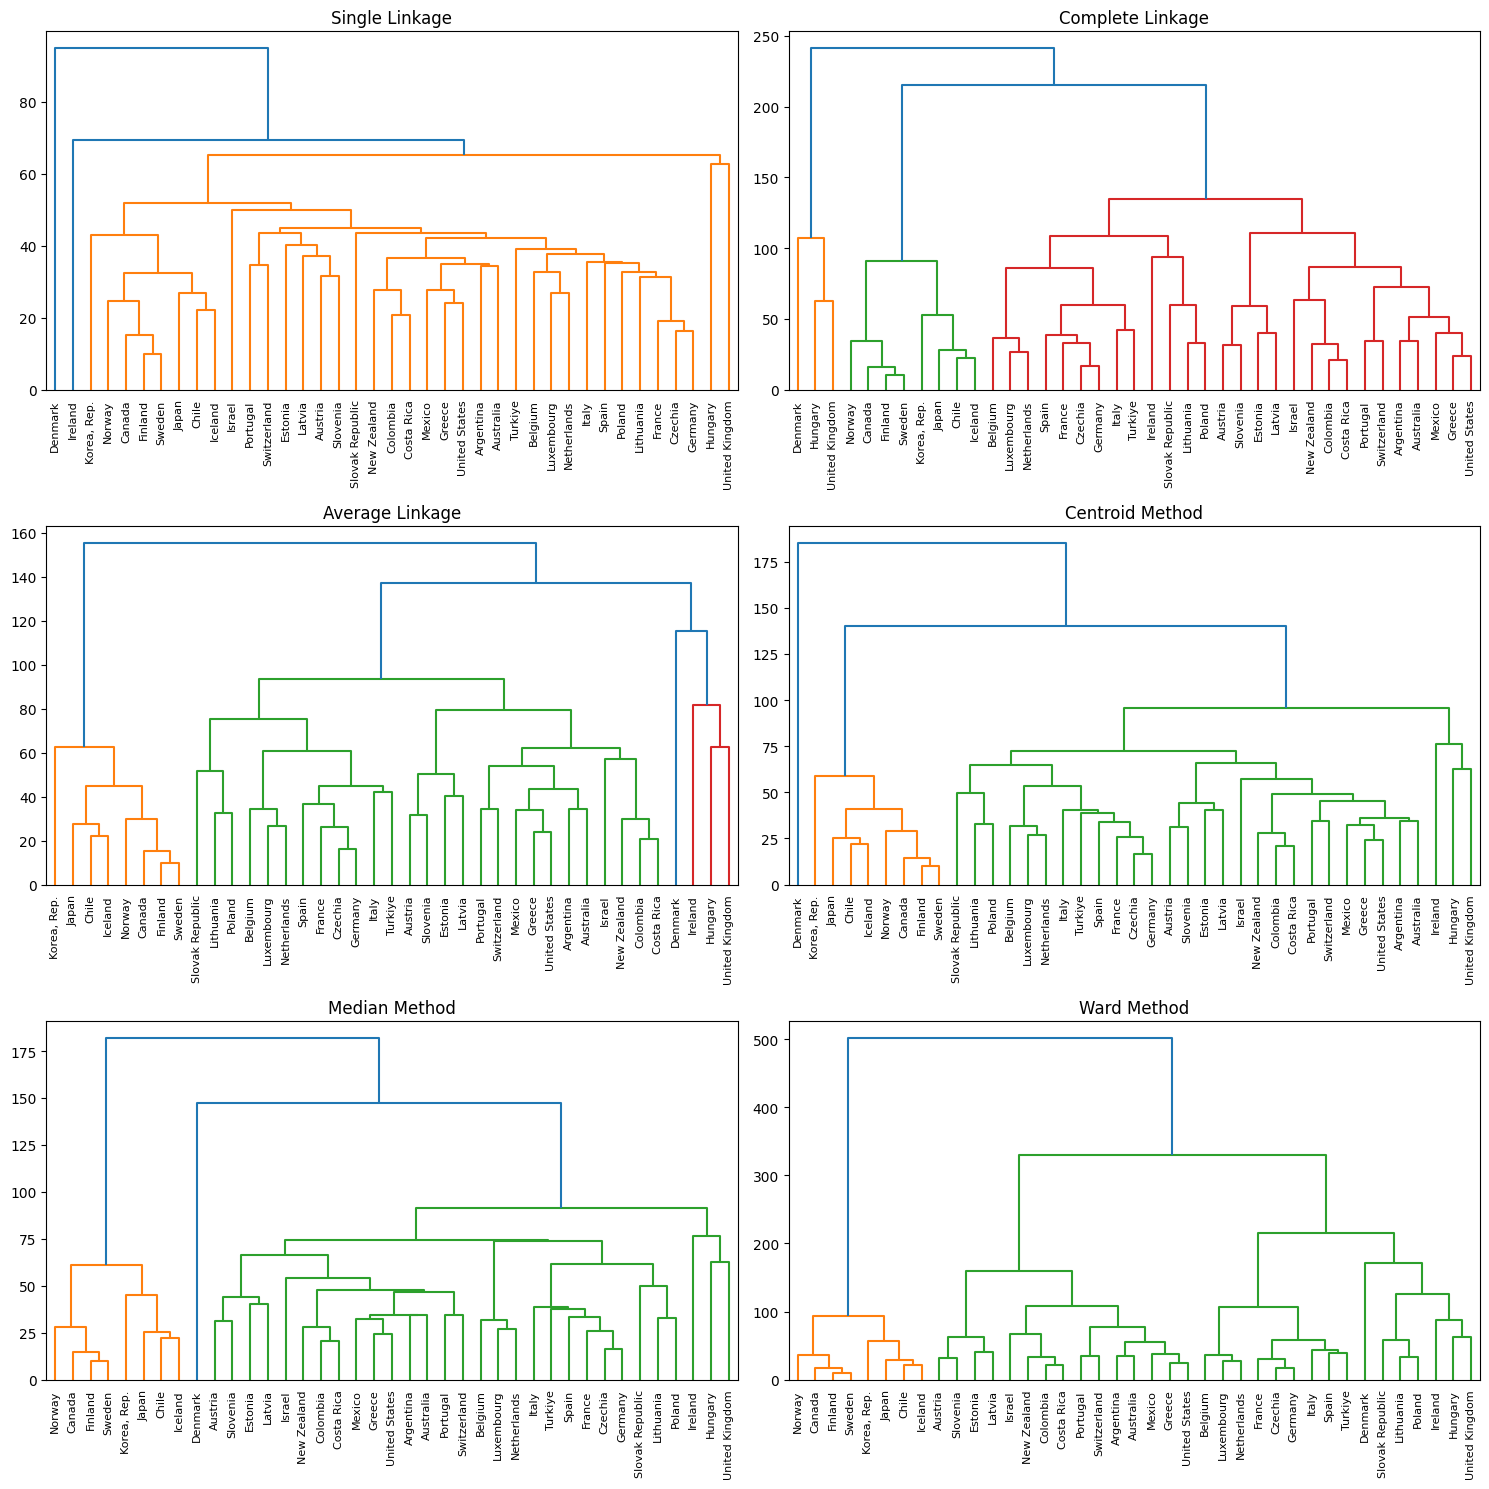

In [124]:
from scipy.cluster.hierarchy import linkage, dendrogram
h_single   = linkage(matriz_distancia, method="single")
h_complete = linkage(matriz_distancia, method="complete")
h_average  = linkage(matriz_distancia, method="average")
h_centroid = linkage(matriz_distancia, method="centroid")
h_median   = linkage(matriz_distancia, method="median")
h_ward     = linkage(matriz_distancia, method="ward")

etiquetas = df['Country Name'].to_list()

plt.rcParams['xtick.labelsize'] = 8


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].set_title("Single Linkage")
dendrogram(h_single, labels=etiquetas, ax=axs[0, 0], leaf_rotation=90, leaf_font_size=8)

axs[0, 1].set_title("Complete Linkage")
dendrogram(h_complete, labels=etiquetas, ax=axs[0, 1], leaf_rotation=90, leaf_font_size=8)

axs[1, 0].set_title("Average Linkage")
dendrogram(h_average, labels=etiquetas, ax=axs[1, 0], leaf_rotation=90, leaf_font_size=8)

axs[1, 1].set_title("Centroid Method")
dendrogram(h_centroid, labels=etiquetas, ax=axs[1, 1], leaf_rotation=90, leaf_font_size=8)

axs[2, 0].set_title("Median Method")
dendrogram(h_median, labels=etiquetas, ax=axs[2, 0], leaf_rotation=90, leaf_font_size=8)

axs[2, 1].set_title("Ward Method")
dendrogram(h_ward, labels=etiquetas, ax=axs[2, 1], leaf_rotation=90, leaf_font_size=8)

plt.tight_layout()
plt.show()